In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt 
import spacy
from toolbox.complexity import complexity
from toolbox.quality import quality
from toolbox.generic import generic
from toolbox.readability import readability

comp, qual, gen,  reada = complexity(), quality(), generic(), readability()


In [19]:
df = pd.read_csv("training_set_rel3.tsv", sep = '\t', encoding = "latin-1")

In [20]:
df

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12972,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
dfx = df
dfx

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12972,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
dfx.isna().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [23]:
dfx.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12976.000000,12976.000000,12976.000000,12976.000000,128.000000,12976.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.395808,4.179485,4.127158,4.137408,37.828125,6.800247,3.333889,3.330556,3.333889,2.444154,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6309.074105,2.136913,4.212544,4.264330,5.240829,8.970705,0.729103,0.726807,0.729103,1.211730,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4438.750000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10044.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15681.250000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [24]:
dfx

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12972,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


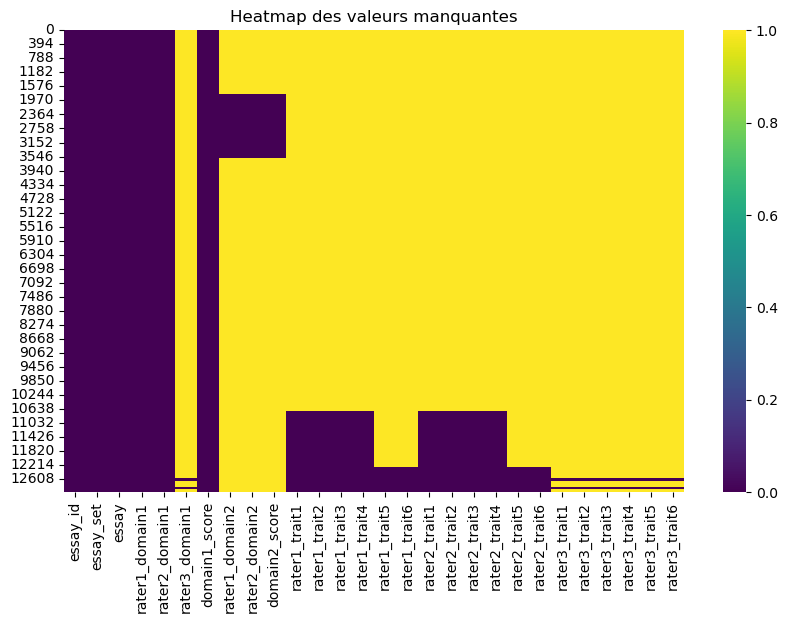

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(dfx.isnull(), cmap='viridis', cbar=True)
plt.title('Heatmap des valeurs manquantes')
plt.show()

## les valeurs manquantes sont en jaune
## Nous allons donc remplir les valeurs manquantes dans différentes colonnes de votre DataFrame en utilisant la stratégie de l'imputation la plus fréquente 


In [14]:
from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(strategy='most_frequent')
#imputer.fit_transform(dfx['rater1_domain2'])
imputer = SimpleImputer(strategy='most_frequent')
dfx['rater1_domain2'] = imputer.fit_transform(dfx[['rater1_domain2']])
dfx['rater1_domain1'] = imputer.fit_transform(dfx[['rater1_domain1']])
dfx['rater2_domain1'] = imputer.fit_transform(dfx[['rater2_domain1']])
dfx['rater3_domain1'] = imputer.fit_transform(dfx[['rater3_domain1']])
dfx['rater2_domain2'] = imputer.fit_transform(dfx[['rater2_domain2']])
dfx['domain2_score'] = imputer.fit_transform(dfx[['domain2_score']])
dfx['domain1_score'] = imputer.fit_transform(dfx[['domain1_score']])
dfx['rater1_trait1'] = imputer.fit_transform(dfx[['rater1_trait1']])
dfx['rater1_trait2'] = imputer.fit_transform(dfx[['rater1_trait2']])
dfx['rater1_trait3'] = imputer.fit_transform(dfx[['rater1_trait3']])
dfx['rater1_trait4'] = imputer.fit_transform(dfx[['rater1_trait4']])
dfx['rater1_trait5'] = imputer.fit_transform(dfx[['rater1_trait5']])
dfx['rater1_trait6'] = imputer.fit_transform(dfx[['rater1_trait6']])
dfx['rater2_trait1'] = imputer.fit_transform(dfx[['rater2_trait1']])
dfx['rater2_trait2'] = imputer.fit_transform(dfx[['rater2_trait2']])
dfx['rater2_trait3'] = imputer.fit_transform(dfx[['rater2_trait3']])
dfx['rater2_trait4'] = imputer.fit_transform(dfx[['rater2_trait4']])
dfx['rater2_trait5'] = imputer.fit_transform(dfx[['rater2_trait5']])
dfx['rater2_trait6'] = imputer.fit_transform(dfx[['rater2_trait6']])
dfx['rater3_trait1'] = imputer.fit_transform(dfx[['rater3_trait1']])
dfx['rater3_trait2'] = imputer.fit_transform(dfx[['rater3_trait2']])
dfx['rater3_trait3'] = imputer.fit_transform(dfx[['rater3_trait3']])
dfx['rater3_trait4'] = imputer.fit_transform(dfx[['rater3_trait4']])
dfx['rater3_trait5'] = imputer.fit_transform(dfx[['rater3_trait5']])
dfx['rater3_trait6'] = imputer.fit_transform(dfx[['rater3_trait6']])
dfx


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,40.0,8,4.0,4.0,4.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,40.0,9,4.0,4.0,4.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,40.0,7,4.0,4.0,4.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,40.0,10,4.0,4.0,4.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,40.0,8,4.0,4.0,4.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,40.0,35,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
12972,21628,8,I never understood the meaning laughter is th...,15,17,40.0,32,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,4.0,4.0,4.0,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,40.0,40,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [10]:
dfx.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

In [11]:
dfx

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,40.0,8,4.0,4.0,4.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,40.0,9,4.0,4.0,4.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,40.0,7,4.0,4.0,4.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,40.0,10,4.0,4.0,4.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,40.0,8,4.0,4.0,4.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,40.0,35,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
12972,21628,8,I never understood the meaning laughter is th...,15,17,40.0,32,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,4.0,4.0,4.0,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,40.0,40,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [12]:
#dfa.isna().sum()

In [13]:
dfx

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,40.0,8,4.0,4.0,4.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,40.0,9,4.0,4.0,4.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,40.0,7,4.0,4.0,4.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,40.0,10,4.0,4.0,4.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,40.0,8,4.0,4.0,4.0,...,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,40.0,35,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
12972,21628,8,I never understood the meaning laughter is th...,15,17,40.0,32,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,4.0,4.0,4.0,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,40.0,40,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [ ]:

dfx['token_nbr'] = dfx['essay'].apply(gen.get_token_nbr)
dfx['mean_len'] = dfx['essay'].apply(gen.get_mean_len)
dfx['sophisticated_nbr'] = dfx['essay'].apply(qual.get_sophisticated_nbr)
dfx['level_of_language'] = dfx['essay'].apply(qual.level_of_language)
dfx['gunning_fog'] = dfx['essay'].apply(g_fog)
dfx['ari'] = dfx['essay'].apply(reada.ari)
dfx['smog_index'] = dfx['essay'].apply(reada.smog_index)
dfx['flesch_kincaid'] = dfx['essay'].apply(reada.flesch_kincaid)
dfx['coleman_liau'] = dfx['essay'].apply(comp.coleman_liau)
dfx['dale_chall_readability'] = dfx['essay'].apply(reada.dale_chall_readability)
dfx['root_ttr'] = dfx['essay'].apply(comp.root_ttr)
dfx['ttr'] = dfx['essay'].apply(comp.ttr)
dfx['log_ttr'] = dfx['essay'].apply(comp.log_ttr)
dfx['mass_ttr'] = dfx['essay'].apply(comp.mass_ttr)
dfx['msttr'] = dfx['essay'].apply(comp.msttr)
dfx['mtld'] = dfx['essay'].apply(comp.mtld)
dfx

In [ ]:
dfx[['essay_id', 'essay_set', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'token_nbr',
       'mean_len', 'sophisticated_nbr', 'gunning_fog',
       'ari', 'smog_index', 'flesch_kincaid', 'coleman_liau',
       'dale_chall_readability', 'root_ttr', 'ttr', 'log_ttr', 'mass_ttr',
       'msttr', 'mtld']].corr()

In [ ]:
dfx['domain1_score'] = df['domain1_score']
dfa = dfx.copy(deep=True)
dfa

In [ ]:
from sklearn.impute import SimpleImputer
dfa['domain1_score'] = df['domain1_score']
dfa

#imputer = SimpleImputer(strategy='most_frequent')
#imputer.fit_transform(dfx['rater1_domain2'])
imputer = SimpleImputer(strategy='most_frequent')
dfa['rater3_domain1'] = imputer.fit_transform(dfa[['rater3_domain1']])
dfa1 = dfa[dfa.essay_set == 1]
dfa2 = dfa[dfa.essay_set == 2]
dfa3 = dfa[dfa.essay_set == 3]
dfa4 = dfa[dfa.essay_set == 4]
dfa5 = dfa[dfa.essay_set == 5]
dfa6 = dfa[dfa.essay_set == 6]
dfa7 = dfa[dfa.essay_set == 7]
dfa8 = dfa[dfa.essay_set == 8]

In [ ]:
dfa.columns

In [ ]:
dfa.isna().sum()

In [ ]:
dfa.to_excel("test.xlsx") 


In [ ]:
dfl = dfa.copy(deep=True)
#dfa1 = dfa[dfa.essay_set == 1]
#dfa2 = dfa[dfa.essay_set == 2]
#dfa3 = dfa[dfa.essay_set == 3]
#dfa4 = dfa[dfa.essay_set == 4]
#dfa5 = dfa[dfa.essay_set == 5]
#dfa6 = dfa[dfa.essay_set == 6]
#dfa7 = dfa[dfa.essay_set == 7]
#dfa8 = dfa[dfa.essay_set == 8]

In [ ]:
dfa1['domain1_score'] = (dfa1['domain1_score'] - dfa1['domain1_score'].min()) / (dfa1['domain1_score'].max() - dfa1['domain1_score'].min()) * (10 - 1) + 1
dfa1['domain1_score'] = dfa1['domain1_score'].round().astype(int)

dfa1['rater1_domain1'] = (dfa1['rater1_domain1'] - dfa1['rater1_domain1'].min()) / (dfa1['rater1_domain1'].max() - dfa1['rater1_domain1'].min()) * (10 - 1) + 1
dfa1['rater1_domain1'] = dfa1['rater1_domain1'].round().astype(int)

dfa1['rater2_domain1'] = (dfa1['rater2_domain1'] - dfa1['rater2_domain1'].min()) / (dfa1['rater2_domain1'].max() - dfa1['rater2_domain1'].min()) * (10 - 1) + 1
dfa1['rater2_domain1'] = dfa1['rater2_domain1'].round().astype(int)

#dfa1['rater3_domain1'] = (dfa1['rater3_domain1'] - dfa1['rater3_domain1'].min()) / (dfa1['rater3_domain1'].max() - dfa1['rater3_domain1'].min()) * (10 - 1) + 1
#dfa1['rater3_domain1'] = dfa1['rater3_domain1'].round().astype(int)

dfa2['domain1_score'] = (dfa2['domain1_score'] - dfa2['domain1_score'].min()) / (dfa2['domain1_score'].max() - dfa2['domain1_score'].min()) * (10 - 1) + 1
dfa2['domain1_score'] = dfa2['domain1_score'].round().astype(int)

dfa2['rater1_domain1'] = (dfa2['rater1_domain1'] - dfa2['rater1_domain1'].min()) / (dfa2['rater1_domain1'].max() - dfa2['rater1_domain1'].min()) * (10 - 1) + 1
dfa2['rater1_domain1'] = dfa2['rater1_domain1'].round().astype(int)

dfa2['rater2_domain1'] = (dfa2['rater2_domain1'] - dfa2['rater2_domain1'].min()) / (dfa2['rater2_domain1'].max() - dfa2['rater2_domain1'].min()) * (10 - 1) + 1
dfa2['rater2_domain1'] = dfa2['rater2_domain1'].round().astype(int)

#dfa2['rater3_domain1'] = (dfa2['rater3_domain1'] - dfa2['rater3_domain1'].min()) / (dfa2['rater3_domain1'].max() - dfa2['rater3_domain1'].min()) * (10 - 1) + 1
#dfa2['rater3_domain1'] = dfa2['rater3_domain1'].round().astype(int)

dfa3['domain1_score'] = (dfa3['domain1_score'] - dfa3['domain1_score'].min()) / (dfa3['domain1_score'].max() - dfa3['domain1_score'].min()) * (10 - 1) + 1
dfa3['domain1_score'] = dfa3['domain1_score'].round().astype(int)

dfa3['rater1_domain1'] = (dfa3['rater1_domain1'] - dfa3['rater1_domain1'].min()) / (dfa3['rater1_domain1'].max() - dfa3['rater1_domain1'].min()) * (10 - 1) + 1
dfa3['rater1_domain1'] = dfa3['rater1_domain1'].round().astype(int)

dfa3['rater2_domain1'] = (dfa3['rater2_domain1'] - dfa3['rater2_domain1'].min()) / (dfa3['rater2_domain1'].max() - dfa3['rater2_domain1'].min()) * (10 - 1) + 1
dfa3['rater2_domain1'] = dfa3['rater2_domain1'].round().astype(int)

#dfa3['rater3_domain1'] = (dfa3['rater3_domain1'] - dfa3['rater3_domain1'].min()) / (dfa3['rater3_domain1'].max() - dfa3['rater3_domain1'].min()) * (10 - 1) + 1
#dfa3['rater3_domain1'] = dfa3['rater3_domain1'].round().astype(int)

dfa4['domain1_score'] = (dfa4['domain1_score'] - dfa4['domain1_score'].min()) / (dfa4['domain1_score'].max() - dfa4['domain1_score'].min()) * (10 - 1) + 1
dfa4['domain1_score'] = dfa4['domain1_score'].round().astype(int)

dfa4['rater1_domain1'] = (dfa4['rater1_domain1'] - dfa4['rater1_domain1'].min()) / (dfa4['rater1_domain1'].max() - dfa4['rater1_domain1'].min()) * (10 - 1) + 1
dfa4['rater1_domain1'] = dfa4['rater1_domain1'].round().astype(int)

dfa4['rater2_domain1'] = (dfa4['rater2_domain1'] - dfa4['rater2_domain1'].min()) / (dfa4['rater2_domain1'].max() - dfa4['rater2_domain1'].min()) * (10 - 1) + 1
dfa4['rater2_domain1'] = dfa4['rater2_domain1'].round().astype(int)

#dfa4['rater3_domain1'] = (dfa4['rater3_domain1'] - dfa4['rater3_domain1'].min()) / (dfa4['rater3_domain1'].max() - dfa4['rater3_domain1'].min()) * (10 - 1) + 1
#dfa4['rater3_domain1'] = dfa4['rater3_domain1'].round().astype(int)

dfa5['domain1_score'] = (dfa5['domain1_score'] - dfa5['domain1_score'].min()) / (dfa5['domain1_score'].max() - dfa5['domain1_score'].min()) * (10 - 1) + 1
dfa5['domain1_score'] = dfa5['domain1_score'].round().astype(int)

dfa5['rater1_domain1'] = (dfa5['rater1_domain1'] - dfa5['rater1_domain1'].min()) / (dfa5['rater1_domain1'].max() - dfa5['rater1_domain1'].min()) * (10 - 1) + 1
dfa5['rater1_domain1'] = dfa5['rater1_domain1'].round().astype(int)

dfa5['rater2_domain1'] = (dfa5['rater2_domain1'] - dfa5['rater2_domain1'].min()) / (dfa5['rater2_domain1'].max() - dfa5['rater2_domain1'].min()) * (10 - 1) + 1
dfa5['rater2_domain1'] = dfa5['rater2_domain1'].round().astype(int)

#dfa5['rater3_domain1'] = (dfa5['rater3_domain1'] - dfa5['rater3_domain1'].min()) / (dfa5['rater3_domain1'].max() - dfa5['rater3_domain1'].min()) * (10 - 1) + 1
#dfa5['rater3_domain1'] = dfa5['rater3_domain1'].round().astype(int)

dfa6['domain1_score'] = (dfa6['domain1_score'] - dfa6['domain1_score'].min()) / (dfa6['domain1_score'].max() - dfa6['domain1_score'].min()) * (10 - 1) + 1
dfa6['domain1_score'] = dfa6['domain1_score'].round().astype(int)

dfa6['rater1_domain1'] = (dfa6['rater1_domain1'] - dfa6['rater1_domain1'].min()) / (dfa6['rater1_domain1'].max() - dfa6['rater1_domain1'].min()) * (10 - 1) + 1
dfa6['rater1_domain1'] = dfa6['rater1_domain1'].round().astype(int)

dfa6['rater2_domain1'] = (dfa6['rater2_domain1'] - dfa6['rater2_domain1'].min()) / (dfa6['rater2_domain1'].max() - dfa6['rater2_domain1'].min()) * (10 - 1) + 1
dfa6['rater2_domain1'] = dfa6['rater2_domain1'].round().astype(int)

#dfa6['rater3_domain1'] = (dfa6['rater3_domain1'] - dfa6['rater3_domain1'].min()) / (dfa6['rater3_domain1'].max() - dfa6['rater3_domain1'].min()) * (10 - 1) + 1
#dfa6['rater3_domain1'] = dfa6['rater3_domain1'].round().astype(int)

dfa7['domain1_score'] = (dfa7['domain1_score'] - dfa7['domain1_score'].min()) / (dfa7['domain1_score'].max() - dfa7['domain1_score'].min()) * (10 - 1) + 1
dfa7['domain1_score'] = dfa7['domain1_score'].round().astype(int)

dfa7['rater1_domain1'] = (dfa7['rater1_domain1'] - dfa7['rater1_domain1'].min()) / (dfa7['rater1_domain1'].max() - dfa7['rater1_domain1'].min()) * (10 - 1) + 1
dfa7['rater1_domain1'] = dfa7['rater1_domain1'].round().astype(int)

dfa7['rater2_domain1'] = (dfa7['rater2_domain1'] - dfa7['rater2_domain1'].min()) / (dfa7['rater2_domain1'].max() - dfa7['rater2_domain1'].min()) * (10 - 1) + 1
dfa7['rater2_domain1'] = dfa7['rater2_domain1'].round().astype(int)

#dfa7['rater3_domain1'] = (dfa7['rater3_domain1'] - dfa7['rater3_domain1'].min()) / (dfa7['rater3_domain1'].max() - dfa7['rater3_domain1'].min()) * (10 - 1) + 1
#dfa7['rater3_domain1'] = dfa7['rater3_domain1'].round().astype(int)

dfa8['domain1_score'] = (dfa8['domain1_score'] - dfa8['domain1_score'].min()) / (dfa8['domain1_score'].max() - dfa8['domain1_score'].min()) * (10 - 1) + 1
dfa8['domain1_score'] = dfa8['domain1_score'].round().astype(int)

dfa8['rater1_domain1'] = (dfa8['rater1_domain1'] - dfa8['rater1_domain1'].min()) / (dfa8['rater1_domain1'].max() - dfa8['rater1_domain1'].min()) * (10 - 1) + 1
dfa8['rater1_domain1'] = dfa8['rater1_domain1'].round().astype(int)

dfa8['rater2_domain1'] = (dfa8['rater2_domain1'] - dfa8['rater2_domain1'].min()) / (dfa8['rater2_domain1'].max() - dfa8['rater2_domain1'].min()) * (10 - 1) + 1
dfa8['rater2_domain1'] = dfa8['rater2_domain1'].round().astype(int)

#dfa8['rater3_domain1'] = (dfa8['rater3_domain1'] - dfa8['rater3_domain1'].min()) / (dfa8['rater3_domain1'].max() - dfa8['rater3_domain1'].min()) * (10 - 1) + 1
#dfa8['rater3_domain1'] = dfa8['rater3_domain1'].round().astype(int)

#dfa8['rater1_domain1'] = (dfa8['rater1_domain1'] - dfa8['rater1_domain1'].min()) / (dfa8['rater1_domain1'].max() - dfa8['rater1_domain1'].min()) * (5 - 1) + 1
#dfa8['rater1_domain1'] = dfa8['rater1_domain1'].round().astype(int)
#dfa8

#dfa8['rater2_domain1'] = (dfa8['rater2_domain1'] - dfa8['rater2_domain1'].min()) / (dfa8['rater2_domain1'].max() - dfa8['rater2_domain1'].min()) * (5 - 1) + 1
#dfa8['rater2_domain1'] = dfa8['rater2_domain1'].round().astype(int)
#dfa8

In [ ]:
dfr = pd.concat([dfa1, dfa2, dfa3, dfa4, dfa5, dfa6, dfa7, dfa8], ignore_index=True)
dfr

In [ ]:
dfr.columns

In [ ]:
#test = dfr.drop(['essay', ''], axis=1).copy()
print(dfa1.shape[0],
dfa2.shape[0],
dfa3.shape[0],
dfa4.shape[0],
dfa5.shape[0],
dfa6.shape[0],
dfa7.shape[0],
dfa8.shape[0])

In [ ]:
Res = dfr.copy(deep=True)
y = Res['domain1_score']
X = Res.drop(['essay', 'domain1_score'], axis=1).copy()

X

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Res = dfr.copy(deep=True)
y = T['domain1_score']
X = T.drop(['essay', 'domain1_score'], axis=1).copy()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=T['domain1_score'], random_state=42)

regr = LinearRegression()
regr.fit(X_train, y_train)

In [ ]:
print(regr.score(X_test, y_test))

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = regr.predict(X_test)
print(mean_squared_error(y_test, y_pred))

In [ ]:
y_pred = regr.predict(X_test)
#plt.scatter(X_test['essay_id'], y_test, color ='b')
#plt.plot(X_test['essay_id'], y_pred, color ='k')

#plt.show()
import numpy as np
import matplotlib.pyplot as plt

data = dfr['domain1_score']

value_range = range(1, 10)

value_counts = np.histogram(data, bins=list(value_range) + [max(value_range) + 1])[0]

plt.bar(value_range, value_counts, color='blue', alpha=0.7)

plt.xlabel('Value Range')
plt.ylabel('Occurrences')
plt.title('Occurrences of Values in a Range')

plt.show()


In [ ]:
dfr[['essay_id', 'essay_set', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'token_nbr',
       'mean_len', 'sophisticated_nbr', 'gunning_fog',
       'ari', 'smog_index', 'flesch_kincaid', 'coleman_liau',
       'dale_chall_readability', 'root_ttr', 'ttr', 'log_ttr', 'mass_ttr',
       'msttr', 'mtld']].corr()

In [ ]:
(dfr[['essay_id', 'essay_set', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'token_nbr',
       'mean_len', 'sophisticated_nbr', 'gunning_fog',
       'ari', 'smog_index', 'flesch_kincaid', 'coleman_liau',
       'dale_chall_readability', 'root_ttr', 'ttr', 'log_ttr', 'mass_ttr',
       'msttr', 'mtld']].corr()).to_excel('output.xlsx', index=False)

In [ ]:
round(2.6)

In [ ]:
dfr.columns

In [ ]:
T.columns

In [ ]:
y = T['domain1_score']
X = T.drop(['essay', 'domain1_score'], axis=1).copy()
X

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Assuming you have a pandas DataFrame 'df' with features and target variable
# Replace 'your_target_column' with the actual name of your target column

# Load your data (replace 'your_data.csv' with your actual data file)
# df = pd.read_csv('your_data.csv')

# Separate features and target variable
y = T['domain1_score']
X = T.drop(['essay', 'domain1_score'], axis=1).copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate an XGBoost regressor for regression
xg_reg = xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:squarederror')

# Fit the model to the training data
xg_reg.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = xg_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# You can also access feature importance
feature_importances = xg_reg.feature_importances_
print('Feature Importances:')
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')

threshold = 1.5  # Adjust as needed

# Calculate the percentage of predictions within the threshold
good_predictions = sum(abs(y_test - y_pred) <= threshold)
total_predictions = len(y_test)
percentage_good_predictions = (good_predictions / total_predictions) * 100

print(f'Percentage of predictions within the threshold ({threshold}): {percentage_good_predictions:.2f}%')

In [ ]:
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter
import math
nltk.download('punkt')
import spacy


def stopword_count(text):
    """
    Calculate the count of stopwords in a given text.

    Parameters:
    - text (str): Input text.

    Returns:
    - int: Count of stopwords.
    """
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    stopword_count = sum(1 for word in words if word.lower() in stop_words)
    return stopword_count

def named_entity_recognition(text):
    """
    Perform Named Entity Recognition (NER) on the given text.

    Parameters:
    - text (str): Input text.

    Returns:
    - list: List of named entities and their labels.
    """
    # Load the English language model
    nlp = spacy.load("en_core_web_sm")

    # Process the text with spaCy NLP pipeline
    doc = nlp(text)

    # Extract named entities and their labels
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    
    return len(entities)

def unique_word_count(text):
    """
    Calculate the count of unique words in a given text.

    Parameters:
    - text (str): Input text.

    Returns:
    - int: Count of unique words.
    """
    words = text.split()
    unique_words = set(words)
    unique_word_count = len(unique_words)
    return unique_word_count

def generate_ngrams(text):
    """
    Generate N-grams from the given text.

    Parameters:
    - text (str): Input text.
    
    Returns:
    - list: List of N-grams.
    """
    words = word_tokenize(text)
    n_grams = list(ngrams(words, 2))
    return len(n_grams)

def read_time_estimate(text, words_per_minute=200):
    """
    Estimate read time for a given text.

    Parameters:
    - text (str): Input text.
    - words_per_minute (int): Average reading speed in words per minute (default is 200).

    Returns:
    - float: Estimated read time in minutes.
    """
    word_count = len(text.split())
    read_time = word_count / words_per_minute
    return read_time

import spacy

def dependency_parse_features(text):
    """
    Extract features from the dependency parse tree of the given text.

    Parameters:
    - text (str): Input text.

    Returns:
    - dict: Dictionary of dependency parse features.
    """
    # Load the English language model
    nlp = spacy.load("en_core_web_sm")

    # Process the text with spaCy NLP pipeline
    doc = nlp(text)

    # Initialize feature counters
    num_dependencies = 0
    dep_types = set()

    # Iterate over tokens and extract features from the dependency parse
    for token in doc:
        num_dependencies += len(list(token.children))
        dep_types.add(token.dep_)

    # Calculate average number of dependencies per token
    avg_dependencies_per_token = num_dependencies / len(doc)

    # Create a dictionary of features
    return num_dependencies

def avg_dependencies_per_token(text):
    """
    Extract features from the dependency parse tree of the given text.

    Parameters:
    - text (str): Input text.

    Returns:
    - dict: Dictionary of dependency parse features.
    """
    # Load the English language model
    nlp = spacy.load("en_core_web_sm")

    # Process the text with spaCy NLP pipeline
    doc = nlp(text)

    # Initialize feature counters
    num_dependencies = 0
    dep_types = set()

    # Iterate over tokens and extract features from the dependency parse
    for token in doc:
        num_dependencies += len(list(token.children))
        dep_types.add(token.dep_)

    # Calculate average number of dependencies per token
    avg_dependencies_per_token = num_dependencies / len(doc)

    # Create a dictionary of features
    return avg_dependencies_per_token

def unique_dependency_types(text):
    """
    Extract features from the dependency parse tree of the given text.

    Parameters:
    - text (str): Input text.

    Returns:
    - dict: Dictionary of dependency parse features.
    """
    # Load the English language model
    nlp = spacy.load("en_core_web_sm")

    # Process the text with spaCy NLP pipeline
    doc = nlp(text)

    # Initialize feature counters
    num_dependencies = 0
    dep_types = set()

    # Iterate over tokens and extract features from the dependency parse
    for token in doc:
        num_dependencies += len(list(token.children))
        dep_types.add(token.dep_)

    # Calculate average number of dependencies per token
    avg_dependencies_per_token = num_dependencies / len(doc)

    # Create a dictionary of features
    
    return len(dep_types)

def noun_verb_ratio(text):
    """
    Calculate the Noun-Verb Ratio for the given text.

    Parameters:
    - text (str): Input text.

    Returns:
    - float: Noun-Verb Ratio.
    """
    # Load the English language model
    nlp = spacy.load("en_core_web_sm")

    # Process the text with spaCy NLP pipeline
    doc = nlp(text)

    # Initialize counters for nouns and verbs
    noun_count = 0
    verb_count = 0

    # Iterate over tokens and count nouns and verbs
    for token in doc:
        if token.pos_ == 'NOUN':
            noun_count += 1
        elif token.pos_ == 'VERB':
            verb_count += 1

    # Calculate the Noun-Verb Ratio
    if verb_count > 0:
        ratio = noun_count / verb_count
    else:
        ratio = 0.0

    return ratio

def word_entropy(text):
    """
    Calculate the word entropy for the given text.

    Parameters:
    - text (str): Input text.

    Returns:
    - float: Word Entropy.
    """
    # Tokenize the text into words
    words = text.split()

    # Calculate the frequency distribution of words
    word_counts = Counter(words)

    # Calculate the total number of words
    total_words = len(words)

    # Calculate word probabilities
    probabilities = [count / total_words for count in word_counts.values()]

    # Calculate word entropy
    entropy = -sum(p * math.log2(p) for p in probabilities)

    return entropy

def read_time_difficulty_estimate(text):
    """
    Estimate the difficulty of reading the given text.

    Parameters:
    - text (str): Input text.

    Returns:
    - str: Difficulty level (e.g., 'Easy', 'Moderate', 'Difficult').
    """
    # Tokenize the text into words
    words = text.split()

    # Calculate average word length
    avg_word_length = sum(len(word) for word in words) / len(words)

    # Count unique words
    unique_word_count = len(set(words))

    # Estimate difficulty based on average word length and unique word count
    if avg_word_length <= 4 and unique_word_count <= 50:
        return 'Easy'
    elif avg_word_length <= 6 and unique_word_count <= 100:
        return 0
    else:
        return 1

    
def syllable_count(text):
    """
    Count the number of syllables in the given text.

    Parameters:
    - text (str): Input text.

    Returns:
    - int: Syllable count.
    """
    words = nltk.word_tokenize(text)
    syllable_count = sum([nltk.syllable_count(word) for word in words])
    return syllable_count

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def positive_score(text):
    """
    Estimate emotion scores (positive and negative sentiment) for the given text.

    Parameters:
    - text (str): Input text.

    Returns:
    - dict: Dictionary containing positive and negative emotion scores.
    """
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    # Positive and negative emotion scores
    positive_score = sentiment_scores['pos']
    return positive_score

def negative_score(text):
    """
    Estimate emotion scores (positive and negative sentiment) for the given text.

    Parameters:
    - text (str): Input text.

    Returns:
    - dict: Dictionary containing positive and negative emotion scores.
    """
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    # Positive and negative emotion scores
    negative_score = sentiment_scores['neg']
    return negative_score

def co_reference_features(text):
    """
    Extract co-reference features from the given text.

    Parameters:
    - text (str): Input text.

    Returns:
    - list: List of dictionaries containing co-reference features.
    """
    # Load the English language model with coreference resolution support
    nlp = spacy.load("en_coref_md")

    # Process the text with spaCy NLP pipeline
    doc = nlp(text)

    # Initialize a list to store co-reference features
    co_reference_features_list = []

    # Iterate over sentences and extract co-reference information
    for sent in doc.sents:
        co_reference_info = {'sentence': sent.text, 'co_references': []}

        # Extract co-reference clusters in the sentence
        for cluster in sent._.coref_clusters:
            mentions = [mention.text for mention in cluster.mentions]
            co_reference_info['co_references'].append({
                'representative': cluster.main.text,
                'mentions': mentions
            })

        co_reference_features_list.append(co_reference_info)

    return len(co_reference_features_list)

In [ ]:
def get_prediction(essay):
    data = [get_token_nbr(essay), get_mean_len(essay), get_sophisticated_nbr(essay),
            level_of_language(essay), gunning_fog(essay), ari(essay),
            smog_index(essay), flesch_kincaid(essay), coleman_liau(essay),
            dale_chall_readability(essay), root_ttr(essay), ttr(essay),
            log_ttr(essay), mass_ttr(essay), msttr(essay), mtld(essay),
            negative_score(essay), positive_score(essay), read_time_difficulty_estimate(essay),
            word_entropy(essay), noun_verb_ratio(essay), unique_dependency_types(essay),
            avg_dependencies_per_token(essay), dependency_parse_features(essay),
            read_time_estimate(essay), generate_ngrams(essay),
            unique_word_count(essay), stopword_count(essay)]

    # Reshape the data to match the model's expectations
    data_reshaped = [data]

    columns = ['token_nbr', 'mean_len', 'sophisticated_nbr', 'level_of_language',
               'gunning_fog', 'ari', 'smog_index', 'flesch_kincaid', 'coleman_liau',
               'dale_chall_readability', 'root_ttr', 'ttr', 'log_ttr', 'mass_ttr',
               'msttr', 'mtld', 'negative_score', 'positive_score',
               'read_time_difficulty_estimate', 'word_entropy', 'noun_verb_ratio',
               'unique_dependency_types', 'avg_dependencies_per_token',
               'dependency_parse_features', 'read_time_estimate', 'generate_ngrams',
               'unique_word_count', 'stopword_count']

    df_essay = pd.DataFrame(data_reshaped, columns=columns)
    y_pred_valid = xg_reg.predict(df_essay)
    return y_pred_valid[0]

print(get_prediction("Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even about the @DATE1's you'll be surprise at how much he/she knows. Believe it or not the computer is much interesting then in class all day reading out of books. If your child is home on your computer or at a local library, it's better than being out with friends being fresh, or being perpressured to doing something they know isnt right. You might not know where your child is, @CAPS2 forbidde in a hospital bed because of a drive-by. Rather than your child on the computer learning, chatting or just playing games, safe and sound in your home or community place. Now I hope you have reached a point to understand and agree with me, because computers can have great effects on you or child because it gives us time to chat with friends/new people, helps us learn about the globe and believe or not keeps us out of troble. Thank you for listening."))


In [ ]:
len(X.columns)

In [ ]:
print(len(T[T['domain1_score'] == 1]),
len(T[T['domain1_score'] == 2]),
len(T[T['domain1_score'] == 3]),
len(T[T['domain1_score'] == 4]),
len(T[T['domain1_score'] == 5]),
len(T[T['domain1_score'] == 6]),
len(T[T['domain1_score'] == 7]),
len(T[T['domain1_score'] == 8]),
len(T[T['domain1_score'] == 9]),
len(T[T['domain1_score'] == 10]))


In [ ]:
get = "Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even about the @DATE1's you'll be surprise at how much he/she knows. Believe it or not the computer is much interesting then in class all day reading out of books. If your child is home on your computer or at a local library, it's better than being out with friends being fresh, or being perpressured to doing something they know isnt right. You might not know where your child is, @CAPS2 forbidde in a hospital bed because of a drive-by. Rather than your child on the computer learning, chatting or just playing games, safe and sound in your home or community place. Now I hope you have reached a point to understand and agree with me, because computers can have great effects on you or child because it gives us time to chat with friends/new people, helps us learn about the globe and believe or not keeps us out of troble. Thank you for listening."

print(generate_ngrams(get))

In [ ]:
#T['co_reference_features'] = T['essay'].apply(co_reference_features)
T['negative_score'] = T['essay'].apply(negative_score)
T['positive_score'] = T['essay'].apply(positive_score)
#T['syllable_count'] = T['essay'].apply(syllable_count)
T['read_time_difficulty_estimate'] = T['essay'].apply(read_time_difficulty_estimate)
T['word_entropy'] = T['essay'].apply(word_entropy)
T['noun_verb_ratio'] = T['essay'].apply(noun_verb_ratio)
T['unique_dependency_types'] = T['essay'].apply(unique_dependency_types)
T['avg_dependencies_per_token'] = T['essay'].apply(avg_dependencies_per_token)
T['dependency_parse_features'] = T['essay'].apply(dependency_parse_features)
T['read_time_estimate'] = T['essay'].apply(read_time_estimate)
#T['noun_verb_ratio'] = T['essay'].apply(noun_verb_ratio)
T['generate_ngrams'] = T['essay'].apply(generate_ngrams)
T['unique_word_count'] = T['essay'].apply(unique_word_count)
#T['named_entity_recognition'] = T['essay'].apply(named_entity_recognition)
T['stopword_count'] = T['essay'].apply(stopword_count)
T

In [ ]:
T.to_excel("save1.xlsx")

In [ ]:
C = T.drop(['essay'], axis=1).copy()
C.corr()


In [ ]:
C.columns

In [ ]:
C

In [ ]:
def change(x):
    if x == 'Easy':
        return 0
    elif x == 0:
        return 1
    return 2

T['read_time_difficulty_estimate'] = T['read_time_difficulty_estimate'].apply(change)
T